In [2]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
import lazypredict
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors._classification import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pdpbox import pdp, get_dataset, info_plots
import matplotlib.pyplot as plt
def get_classification_metrics(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average="weighted")
    
    # Generate confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    # Generate classification report
    class_report = classification_report(y_true, y_pred)
    
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion_mat,
        "Classification Report": class_report
    }

In [3]:

models_to_include = [
    'svc', 'random_forest', 'kneighbors', 'gradient_boosting', 'decision_tree'
]

data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     classifiers=[RandomForestClassifier, LogisticRegression, KNeighborsClassifier,MLPClassifier,SVC,xgb.XGBClassifier])


In [13]:
dataset =  pd.read_csv("./datasets/adult.csv")
print(dataset.shape)
# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)
data = data.fillna(np.nan)

le= LabelEncoder()
dataset['income'] = np.where(dataset['income'] == '<=50K', 0, 1)
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')


# dataset.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)
edu_map = dataset[['education','education.num']].drop_duplicates()
dataset.drop(labels=["education", 'native.country',"relationship"], axis = 1, inplace = True)
sex_le = LabelEncoder()
dataset['sex'] = sex_le.fit_transform(dataset['sex'])
marital_le = LabelEncoder()
dataset['marital.status'] = marital_le.fit_transform(dataset['marital.status'])
data = dataset.copy()
X = dataset.drop(columns='income')
X = pd.get_dummies(X)
Y = dataset['income']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state =123)

clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     classifiers=[RandomForestClassifier, LogisticRegression, KNeighborsClassifier,MLPClassifier,DecisionTreeClassifier,SVC,xgb.XGBClassifier])
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models


(32561, 15)


100%|██████████| 7/7 [01:00<00:00,  8.66s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.87,0.79,0.79,0.86,0.25
MLPClassifier,0.85,0.77,0.77,0.84,27.99
RandomForestClassifier,0.85,0.77,0.77,0.85,3.68
LogisticRegression,0.85,0.76,0.76,0.84,0.12
SVC,0.85,0.76,0.76,0.84,27.51
DecisionTreeClassifier,0.81,0.74,0.74,0.81,0.21
KNeighborsClassifier,0.83,0.74,0.74,0.82,0.82


In [5]:
with open("summary_table.tex", "w") as f:
    f.write(models.to_latex())

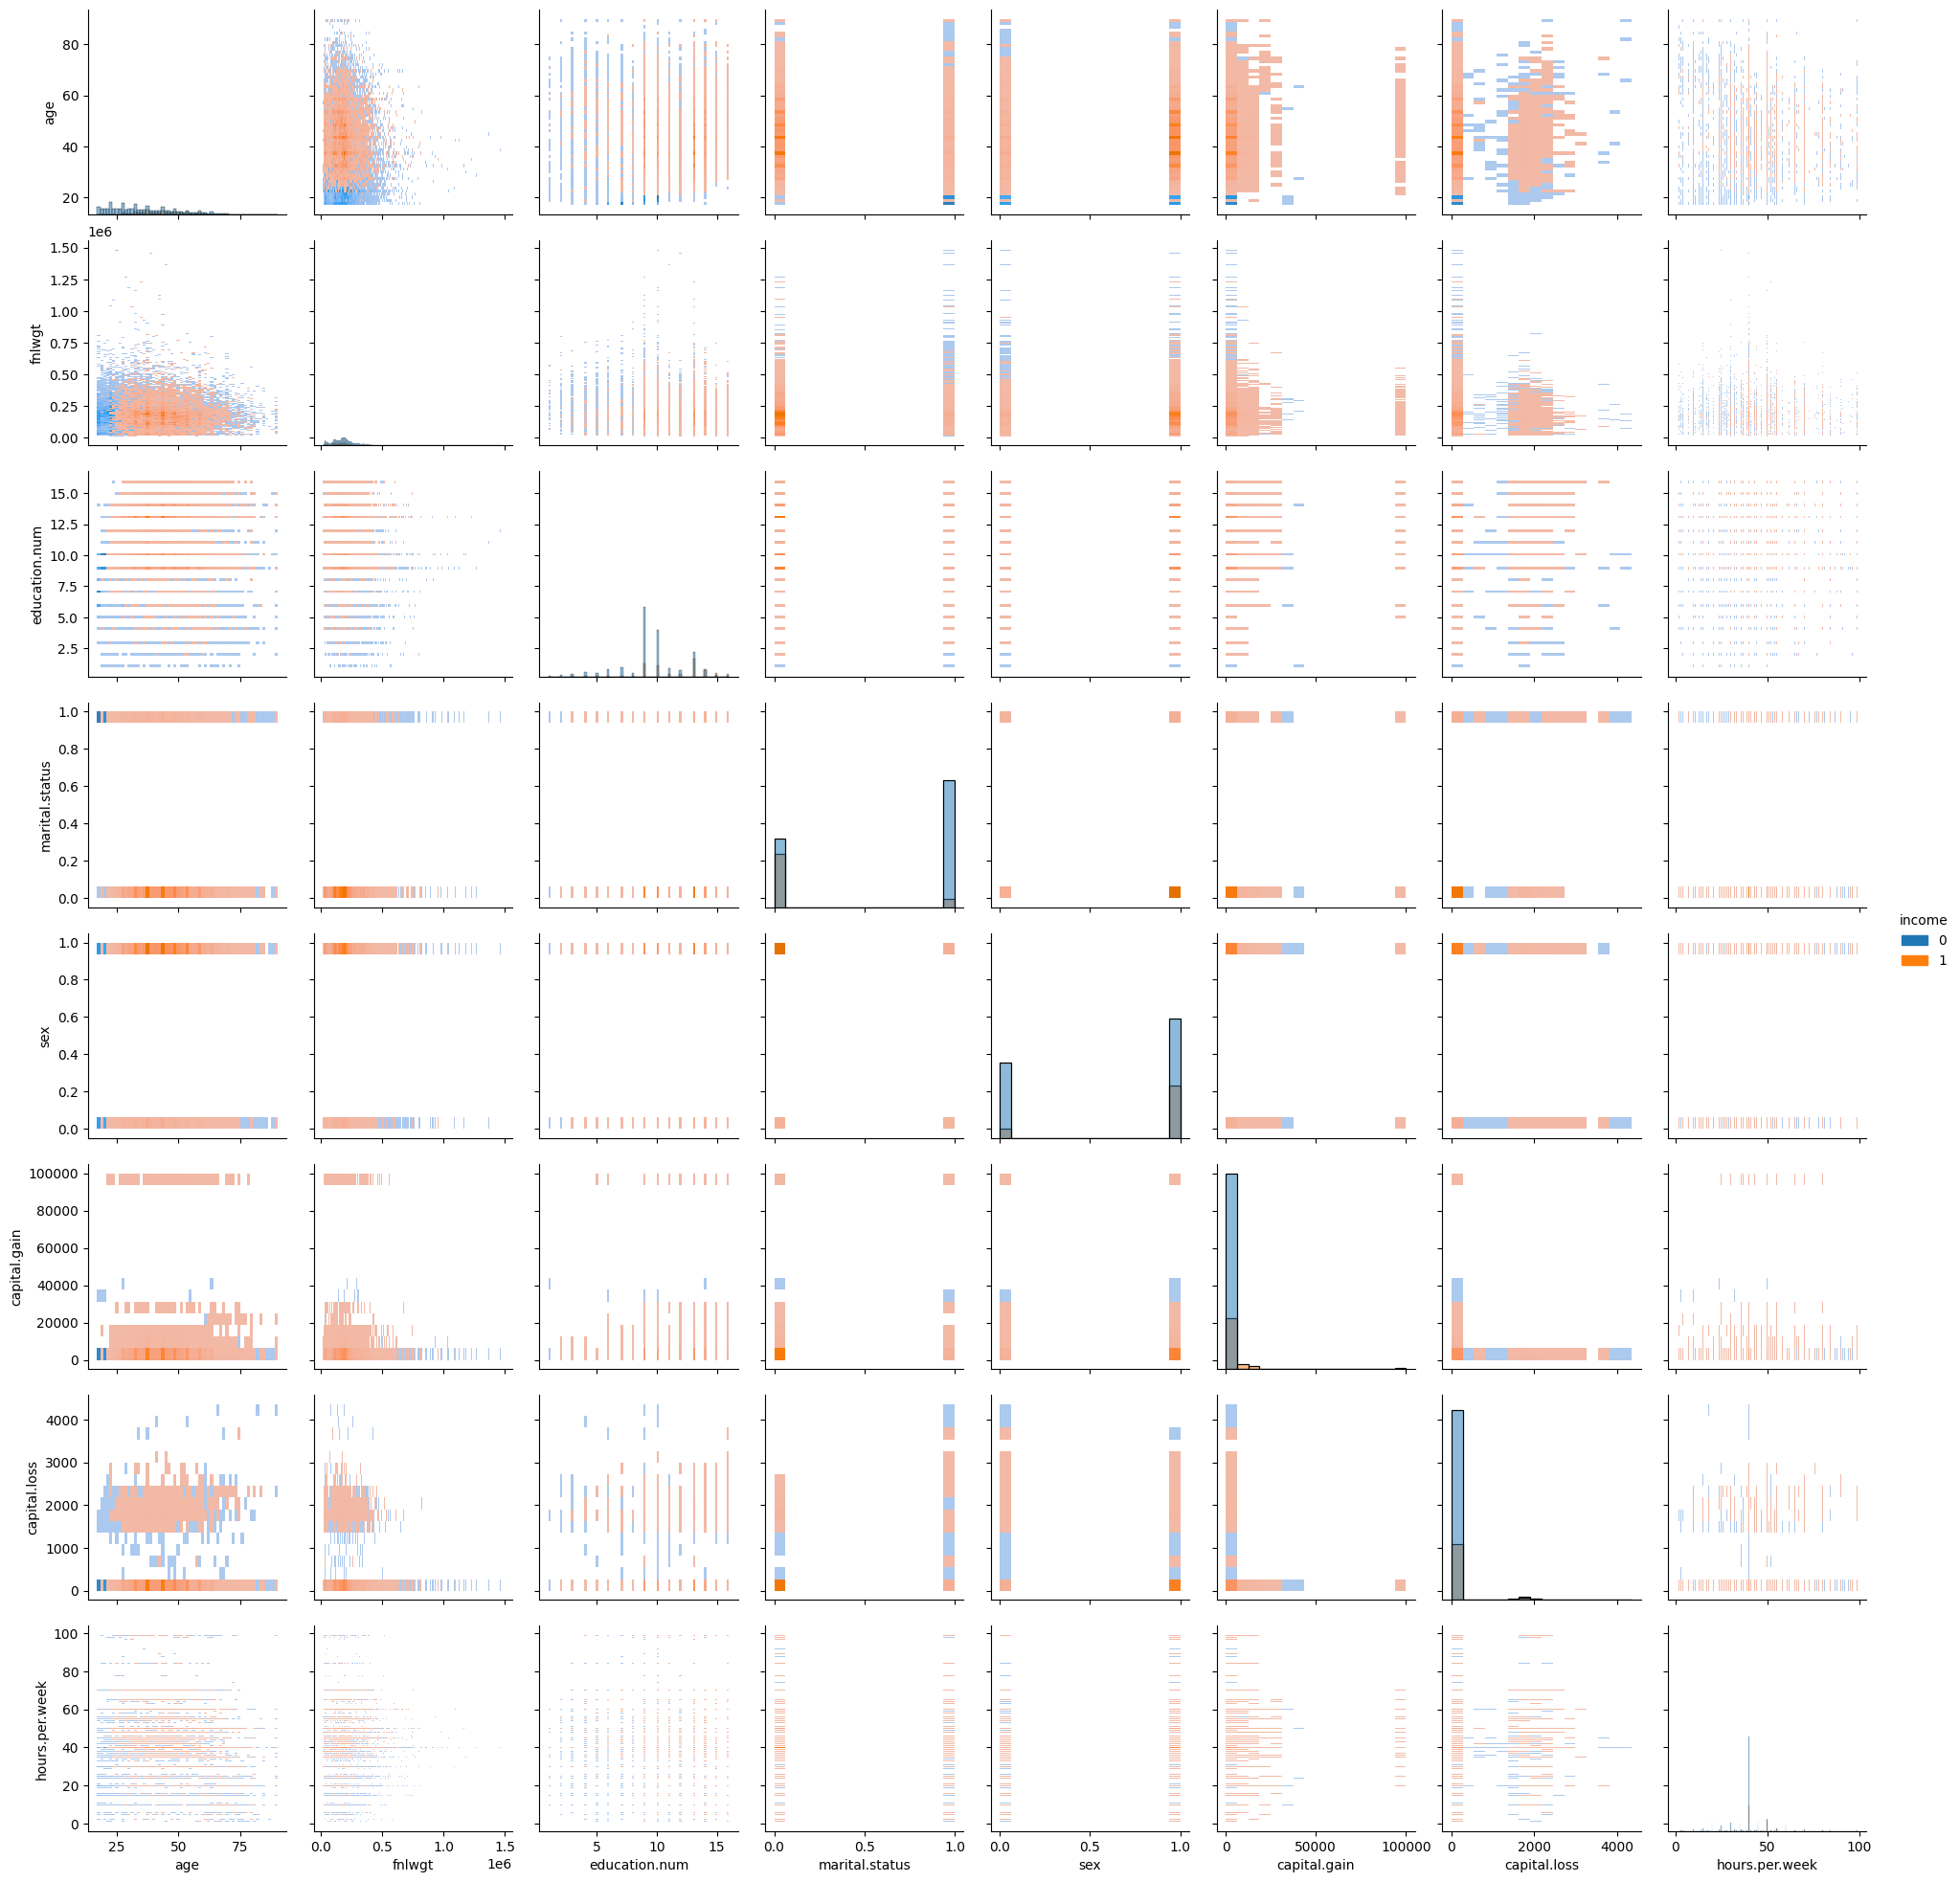

In [6]:
import seaborn as sns
sns.pairplot(dataset,hue='income',kind='hist')


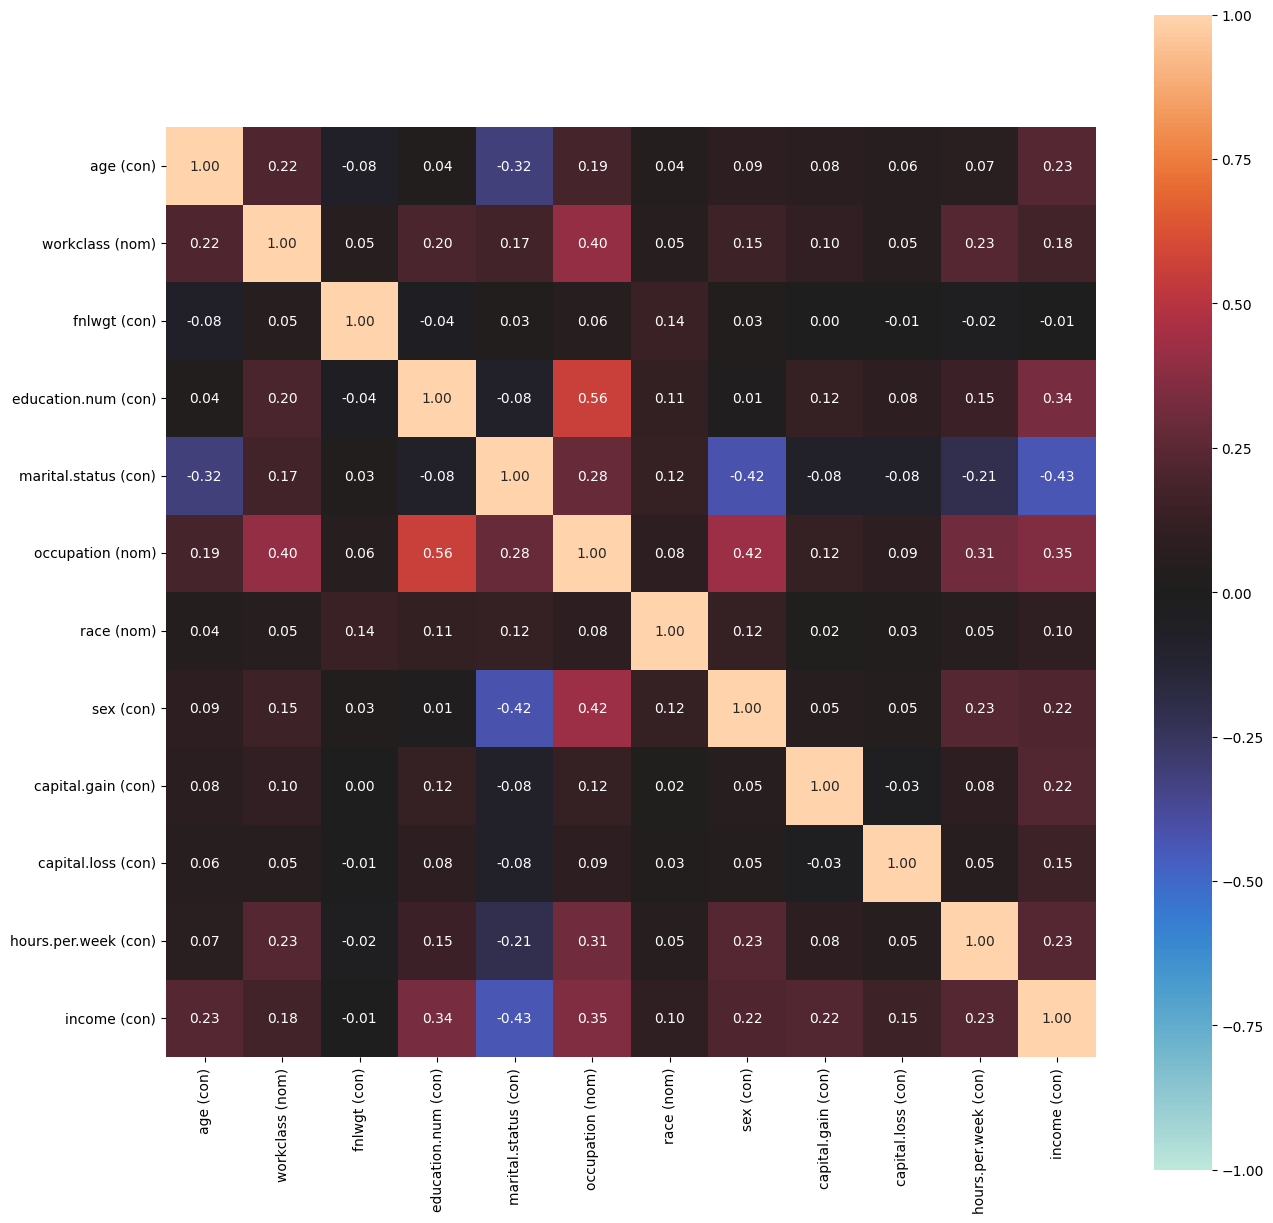

In [15]:
from dython.nominal import associations  # correlation calculation

correlation_matrix = associations(
    data, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True)


<Axes: ylabel='Feature'>

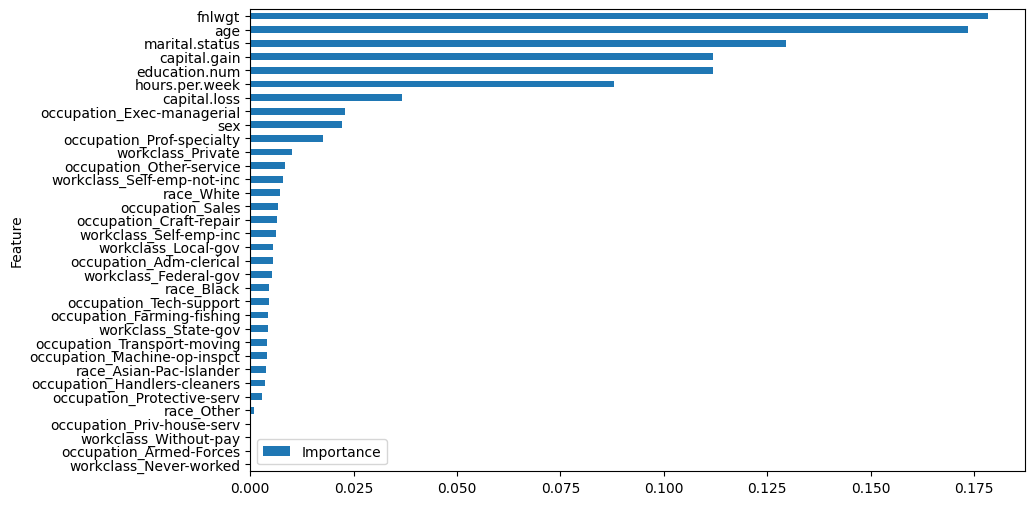

In [5]:

X = dataset.drop(columns='income')
X = pd.get_dummies(X,drop_first=True)
Y = dataset['income']

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state =123)
logistic_regression_model  = RandomForestClassifier().fit(X_train,y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': logistic_regression_model.feature_importances_})

feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
